In [1]:
%config IPCompleter.greedy = True
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np

Creating first machine learning model using sklearn

In [2]:
from sklearn import datasets

digits = datasets.load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
print("Shape of images:{}".format(digits.images.shape))

Shape of images:(1797, 8, 8)


In [5]:
print("X examples: {}".format(digits.data.shape))

X examples: (1797, 64)


In [6]:
print("Y labels: {}".format(digits.target.shape))

Y labels: (1797,)


In [7]:
print("Set of output classes {{{}}}".format(digits.target_names))

Set of output classes {[0 1 2 3 4 5 6 7 8 9]}


In [8]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


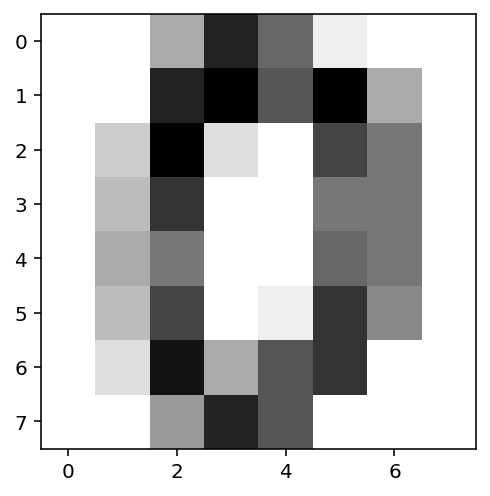

In [9]:
plt.figure()
plt.imshow(16-digits.images[0],cmap='gray')
plt.show()

In [10]:
print("Label for above image:", digits.target[0])

Label for above image: 0


## Ridge Regression
https://en.wikipedia.org/wiki/Tikhonov_regularization

https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf

y = wx where w is a Real number

-------------
##### Ridge Regression Cost function
least square error:   ||wx - y_hat||^2

---------------
Gradient Descent is used to make sure the model is converged

https://en.wikipedia.org/wiki/Gradient_descent

min (wx-y_hat)^T.(wx-y_hat)

#derivative

d((wx-y_hat)^T.(wx-y_hat))/dw = -2x^T.(y-wx)

d((wx-y_hat)^T.(wx-y_hat))/dw = -2x^T.(y-wx) = 0

y = xw

w = x^-1 . y


In [20]:
#split the labeled dataset into a training and test dataset

index_to_split = -1
X_train = digits.data[:index_to_split]
Y_train = digits.target[:index_to_split]

X_test = digits.data[index_to_split:]
Y_test = digits.target[index_to_split:]

In [21]:
X_train.shape, X_test.shape

((1796, 64), (1, 64))

Modelling in Numpy

In [22]:
# train model y = wx

X_train_inv = np.linalg.pinv(X_train)
w = np.dot(X_train_inv, Y_train)

print("W: {}".format(w))

W: [-2.28119225e-15  9.40249350e-02 -3.67939617e-03 -7.72167429e-03
  7.49514697e-02  1.15243563e-02 -2.72158636e-02 -7.31904304e-03
  1.00102690e+00 -2.84132215e-02  1.18887868e-01  6.59994113e-02
 -5.58787175e-02 -7.04137172e-02  9.65429164e-02  2.56033005e-01
 -7.29405068e-01  2.40605548e-02  7.76124220e-02 -2.29357716e-02
 -5.66039721e-02  5.81134072e-02 -4.91673806e-02 -2.62755693e-01
 -9.08254598e-01 -1.49425933e-01  5.59359249e-02  8.97465435e-02
  8.39772547e-02  9.83482587e-02  1.86692450e-03 -2.97298764e+00
  1.80134125e-14 -1.54851687e-01 -8.97570476e-03  1.39494684e-01
 -3.67398683e-02  5.46737441e-02 -9.53756017e-03  1.54241244e-14
  1.00930061e-01  1.23968401e-01 -1.37042140e-02  5.34285543e-03
  1.30949507e-01  5.51389202e-02  2.24650594e-02  7.76787978e-03
  6.14807150e-01  2.67348801e-02  1.20233616e-03 -6.19644555e-02
 -2.06960828e-01 -3.39245068e-02  1.05783054e-01 -1.40682284e-01
 -1.01420937e+00 -1.13249749e-01  2.06527116e-02 -4.39417720e-02
  1.85650152e-02 -6.65

y_hat: [9.30939946] rounds to 9
actual y label: [8]


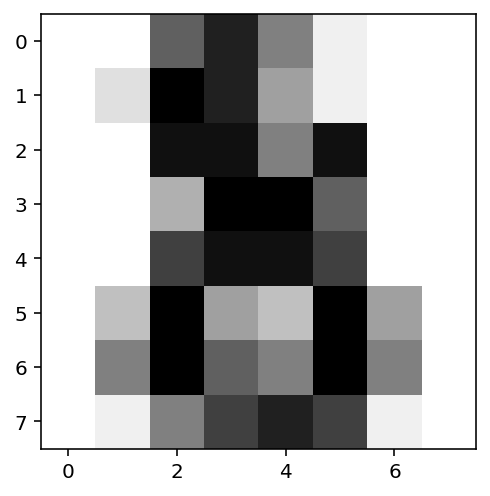

In [24]:
# Test Model

y_hat = X_test @ w

print("y_hat: {} rounds to {}".format(y_hat, int(np.round(y_hat)[0])))
print("actual y label: {}".format(Y_test))
plt.figure()
plt.imshow(16- digits.images[-1], cmap = "gray")
plt.show()